In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
import io
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

## Data Extraction

In [3]:
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}

In [4]:
url = "https://insights.blackcoffer.com/what-if-the-creation-is-taking-over-the-creator/"

In [5]:
page = requests.get(url,headers=headers)

In [6]:
soup= BeautifulSoup(page.text, 'html.parser')

In [7]:
soup

<!DOCTYPE html >

<!--[if IE 8]>    <html class="ie8" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!--> <html lang="en-US"> <!--<![endif]-->
<head><link href="https://fonts.googleapis.com/css?family=Open+Sans%3A300italic%2C400%2C400italic%2C600%2C600italic%2C700%7CRoboto%3A300%2C400%2C400italic%2C500%2C500italic%2C700%2C900" rel="stylesheet"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://insights.blackcoffer.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<meta content="https://insights.blackcoffer.com/wp-content/uploads/2021/06/services-3-1.jpg" property="og:image"/>
<!-- This site is optimized with the Yoast SEO plugin v19.13 - https://yoast.com/wordpress/plugins/seo/ -->
<title>What if the Creation is Taking Over the Creator? - Blackcoffer Insights</title>
<meta con

In [8]:
topic= soup.find('title').text
topic

'What if the Creation is Taking Over the Creator? - Blackcoffer Insights'

In [9]:
paragraph =soup.find_all("p")

In [10]:
import re
clean = re.compile('[<p></p>"\xa0]')
para = re.sub(clean,'',str(paragraph))
para

'[Human minds, a fascination in itself carrying the otential of tinkering nature with the ixie dust intelligence, creating and solving the mysteries and wonders with anything but admiration. However, no matter how cativating a human mind can be, it could sometimes be aalled. It could be the hunger or maybe the desire to want more, to go beyond and unravel the limitations, or maybe something like ure greed. Humans have never stoed and always kee evolving when it comes to intelligence and this is what makes them the sureme., Intelligence calls out for suremacy and so, what if there was to evolve something that oosed a challenge to the very human minds, to their caabilities while making them question their own imortance among themselves? Artificial Intelligence came as a revolution, havoc when it first came to the light. The concet of making machines does work on their own, like granting machines –The Intelligence., The idea of making machines work like humans came back in the 19s. Back t

## Text Preprocessing

In [11]:
content = topic+" "+para


### Conversion to LowerCase

In [12]:
content=content.lower()

### Tokenization

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
tokenized_content= word_tokenize(content)
tokenized_content

['what',
 'if',
 'the',
 'creation',
 'is',
 'taking',
 'over',
 'the',
 'creator',
 '?',
 '-',
 'blackcoffer',
 'insights',
 '[',
 'human',
 'minds',
 ',',
 'a',
 'fascination',
 'in',
 'itself',
 'carrying',
 'the',
 'otential',
 'of',
 'tinkering',
 'nature',
 'with',
 'the',
 'ixie',
 'dust',
 'intelligence',
 ',',
 'creating',
 'and',
 'solving',
 'the',
 'mysteries',
 'and',
 'wonders',
 'with',
 'anything',
 'but',
 'admiration',
 '.',
 'however',
 ',',
 'no',
 'matter',
 'how',
 'cativating',
 'a',
 'human',
 'mind',
 'can',
 'be',
 ',',
 'it',
 'could',
 'sometimes',
 'be',
 'aalled',
 '.',
 'it',
 'could',
 'be',
 'the',
 'hunger',
 'or',
 'maybe',
 'the',
 'desire',
 'to',
 'want',
 'more',
 ',',
 'to',
 'go',
 'beyond',
 'and',
 'unravel',
 'the',
 'limitations',
 ',',
 'or',
 'maybe',
 'something',
 'like',
 'ure',
 'greed',
 '.',
 'humans',
 'have',
 'never',
 'stoed',
 'and',
 'always',
 'kee',
 'evolving',
 'when',
 'it',
 'comes',
 'to',
 'intelligence',
 'and',
 'this

### Frequency Distribution

In [15]:
from nltk.probability import FreqDist
fdist= FreqDist(tokenized_content)
print(fdist)

<FreqDist with 571 samples and 1650 outcomes>


In [16]:
fdist.most_common(2)

[(',', 121), ('the', 85)]

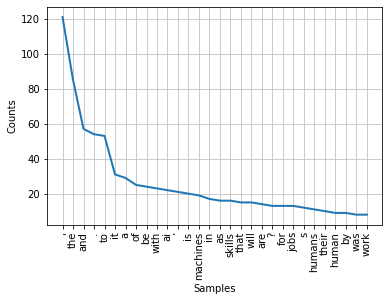

<function matplotlib.pyplot.show(close=None, block=None)>

In [17]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show

### Compilation of all StopWords from .txt file

In [18]:
filenames= ["StopWords_Names.txt","StopWords_Geographic.txt","StopWords_Generic.txt","StopWords_GenericLong.txt",
              "StopWords_DatesandNumbers.txt","StopWords_Currencies.txt","StopWords_Auditor.txt"]
with open('new_stpwrds.txt', 'w') as outfile:
    for names in filenames:
        with open(names) as infile:
            outfile.write(infile.read())
        outfile.write("\n")

In [19]:
newStopWords= open("new_stpwrds.txt")

In [20]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(newStopWords)

In [21]:
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
filtered_sent=[]
for w in tokenized_content:
    if w not in stpwrd:
        filtered_sent.append(w)
#print('Tokenized Sentance:', tokenized_content)
print('Filtered Sentance:', filtered_sent)

Filtered Sentance: ['creation', 'taking', 'creator', '?', '-', 'blackcoffer', 'insights', '[', 'human', 'minds', ',', 'fascination', 'carrying', 'otential', 'tinkering', 'nature', 'ixie', 'dust', 'intelligence', ',', 'creating', 'solving', 'mysteries', 'wonders', 'anything', 'admiration', '.', 'however', ',', 'matter', 'cativating', 'human', 'mind', ',', 'could', 'sometimes', 'aalled', '.', 'could', 'hunger', 'maybe', 'desire', 'want', ',', 'go', 'beyond', 'unravel', 'limitations', ',', 'maybe', 'something', 'like', 'ure', 'greed', '.', 'humans', 'never', 'stoed', 'always', 'kee', 'evolving', 'comes', 'intelligence', 'makes', 'sureme.', ',', 'intelligence', 'calls', 'suremacy', ',', 'evolve', 'something', 'oosed', 'challenge', 'human', 'minds', ',', 'caabilities', 'making', 'question', 'imortance', 'among', '?', 'artificial', 'intelligence', 'came', 'revolution', ',', 'havoc', 'first', 'came', 'light', '.', 'concet', 'making', 'machines', 'work', ',', 'like', 'granting', 'machines', '–

In [23]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, "") 
    return string
 
lis = [remove_punc(i) for i in filtered_sent]

In [24]:
newList = ' '.join(lis).split()

In [25]:
df =pd.DataFrame(newList)
df

,0
0,creation
1,taking
2,creator
3,blackcoffer
4,insights
...,...
772,try
773,run
774,fuel
775,try
